Best education metric:

To determine the best neighborhood in Pittsburgh, we decided to create a metric to determine which area has the best education. I decided a good measure of effective schooling is seeing which area has the highest rate of residents who graduated high school.

Originally we wanted to base it off the effectiveness of schools for younger kids: middle school or elementary school. However, we found it hard to find good data to measure this. I found a dataset that listed the level of education attained by every resident of each area in Pittsburgh over 18 who chose to respond to the survey; this led me to focus on highschool graduation rates, because it is generally considered indicative of the effectiveness of an education from childhood to young-adulthood.

This data was from a dataset gained from the 2014 ACS, question 11.

The metric for "best education" measures what percentage of residents over 18 in each area earned a high school diploma or higher. Whichever area has the highest rate of graduating high school determines that area's score for "best education".

For each area, I took the total number of residents with a high diploma or higher education and divided that by the total number of residents surveyed to get their score out of 1. I took this percentage and scaled it to make the total possible points for the area 30.

In [21]:
import pandas as panda
import math

# Using pandas to help parse through the data set
data = panda.read_csv('EducationalAttainmentData.csv')

# Goal: Read through the respective columns to sum and divide them by the column that has the number of residents surveyed.
# Specifically, add the columns of those who graduated high school (or higher education) and divide by the total number of residents surveyed

# List of the names of the columns to read through
columnsHighSchoolOrMore = [ 
    'Estimate; Total: - Regular high school diploma',
    'Estimate; Total: - GED or alternative credential',
    'Estimate; Total: - Some college, less than 1 year',
    'Estimate; Total: - Some college, 1 or more years, no degree',
    "Estimate; Total: - Associate's degree",
    "Estimate; Total: - Bachelor's degree",
    "Estimate; Total: - Master's degree",
    "Estimate; Total: - Professional school degree",
    "Estimate; Total: - Doctorate degree"
]

# Iterates through the columns in the data set and adds the column if it has the same title as one of those listed above
columnsOfGrads = [col for col in columnsHighSchoolOrMore if col in data.columns]  # creates list of columns that should be added
data['percentageOfHighSchoolGraduates'] = data[columnsOfGrads].sum(axis=1) / data['Estimate; Total:'] 
# Creates a new column in the DataFrame called 'percentageOfHighSchoolGraduates' and sets its rows equal to the respective sums of each valid column,
# then divides by the respective total number of citizens 

# Converts new column into a Python list
percentList = data['percentageOfHighSchoolGraduates'].tolist()  # Remember that this is [0]-[90], not [1]-[91]

# Creates a list of tuples to store the index to track which area has what percentage to print out the name of the area later
areaAndPercentageList = [(index, value) for index, value in enumerate(percentList)]

# Rank the areas from highest to lowest HS graduation rate
rankedAreaList = sorted(areaAndPercentageList, key=lambda x: x[1], reverse=True)

# List of neighborhoods in the dataset
# Doesn't include any NaN (areas where no one responded) and then converts the rest to Strings 
listOfNeighborhoods = data['Neighborhood'].dropna().astype(str).tolist()

# this whole section returns a new final list with the names of the neighborhood and their final scores scaled out of 20 points to add to 
#the overall measure of bestness
finalList = []
for duplet in rankedAreaList:
    k, innerDuplet = duplet  #gets the outer int and inner duplet
    # checks bounds of k
    if k < len(listOfNeighborhoods):
        # Gets the right neighborhood depending on k
        neighborhoodString = listOfNeighborhoods[k]  # k corresponds to the index in 0-based indexing
    else:
        neighborhoodString = None  # if out of bounds, sets k to None
    if isinstance(innerDuplet, tuple):# sees in the inner duplet is a tuple
        intN, doubleValue = innerDuplet  #get the inner dupleet
    else:
        if innerDuplet is None or (isinstance(innerDuplet, float) and math.isnan(innerDuplet)): #if it is none or nan, set the score to 0
            intN, doubleValue = (float('nan'), float('nan')) 
            scaledValue = 0
        else:
            intN, doubleValue = float(innerDuplet), float(innerDuplet)
    # replaces the first section of the inner duplet with k+1
    newInnerDuplet = (float(k + 1), float(doubleValue))
    # this scales the 0-1 to 0-20 points for the overall metric of bestness
    if 0.0 <= doubleValue <= 1.0:
        scaledValue = doubleValue * 20.0  
    else: #just in case value is ouTside of bounds
        scaledValue = doubleValue 
    # sets the score to the scaled out of 20 points value
    if doubleValue == float('nan'):
        scaledValue = 0
    newInnerDuplet = (newInnerDuplet[0], scaledValue)
    finalList.append((neighborhoodString, newInnerDuplet)) # adds the new duplet to the tor list
modifiedFinalList = [(neighborhood, score) for neighborhood, (index, score) in finalList]
print(modifiedFinalList) #prints neighborhood names and their new scores


[('North Shore', 20.0), ('South Shore', 20.0), ('Strip District', 20.0), ('West End', 20.0), ('Point Breeze North', 19.82973149967256), ('Point Breeze', 19.58727001491795), ('Squirrel Hill North', 19.559519475791774), ('Squirrel Hill South', 19.4679326406306), ('Shadyside', 19.43913320586361), ('Regent Square', 19.43152454780362), ('Central Business District', 19.343474779823858), ('Chateau', nan), ('Highland Park', 19.59349593495935), ('Mt. Oliver', 19.31758530183727), ('Troy Hill', 19.231590181430096), ('South Side Flats', 19.150374125030172), ('Greenfield', 19.089790897908976), ('Fairywood', 19.07654921020656), ('Esplen', 18.97872340425532), ('Bloomfield', 18.958049371497804), ('East Carnegie', 18.925831202046034), ('Hays', 18.844765342960287), ('Banksville', 18.836104513064132), ('Windgap', 18.830409356725145), ('Duquesne Heights', 18.73015873015873), ('Bon Air', 18.689075630252102), ('Upper Hill', 18.623242042931164), ('Polish Hill', 18.562874251497007), ('South Side Slopes', 18.5

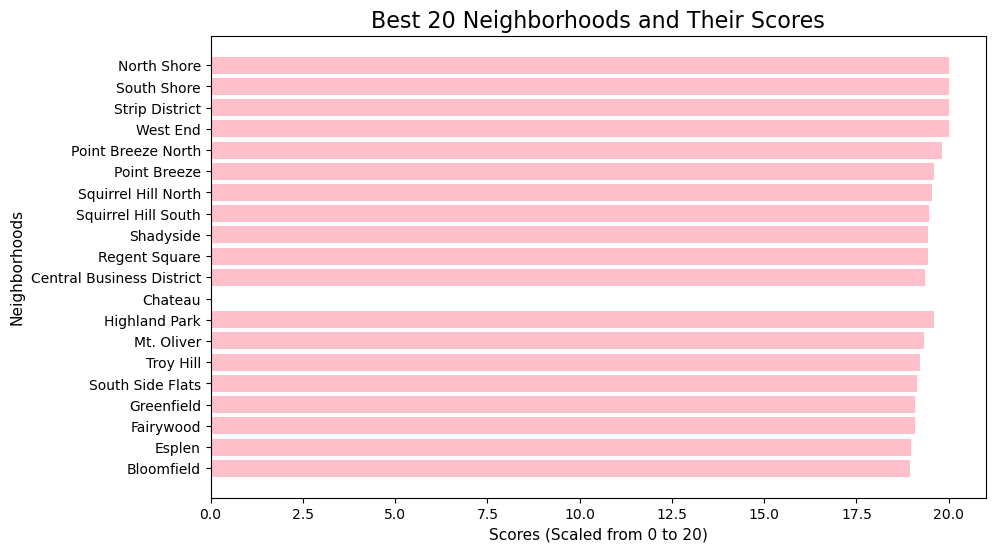

In [14]:
import matplotlib.pyplot as plt
# this makes a list of the first 20 items in the orginal list of neighborhoods and score tuples
top_20_neighborhoods = modified_final_list[:20]
neighborhoods = [item[0] for item in top_20_neighborhoods] #each name
scores = [item[1] for item in top_20_neighborhoods] #each score

plt.figure(figsize=(10, 6))  # this sets the figure size
plt.barh(neighborhoods, scores, color='pink')  # Creates the actual chart
plt.xlabel('Scores (Scaled from 0 to 20)', fontsize=11)  # creates the label for x
plt.ylabel('Neighborhoods', fontsize=11)  # for y
plt.title('Best 20 Neighborhoods and Their Scores', fontsize=16)  # creates title of the chart
plt.gca().invert_yaxis()  # puts the high scores at the top
plt.show() #makes the graph appear 
